In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [27]:
# task 1
# Избирам възможно най-близки възли, за възможно най-точно поведение между тях

nodes1 = [1.6, 2, 2.5, 3.2]
values1 = [2, 8, 14, 15]

nodes2 = [1.6, 2, 2.5]
values2 = [2, 8, 14]

nodes3 = [1.6, 2]
values3 = [2, 8]

In [29]:
def diff_newton(nodes, values):
    if len(nodes) == 1:
        return values[0]
    else:
        return (diff_newton(nodes[1:], values[1:]) - diff_newton(nodes[:-1], values[:-1])) / (nodes[-1] - nodes[0])
    
def newton(nodes, values ,x):
    result = 0
    product = 1

    for i in range(len(nodes)):
        result += diff_newton(nodes[:i+1], values[:i+1]) * product
        product *= (x - nodes[i])
    return result

15.814285714285713
16.799999999999997
20.0


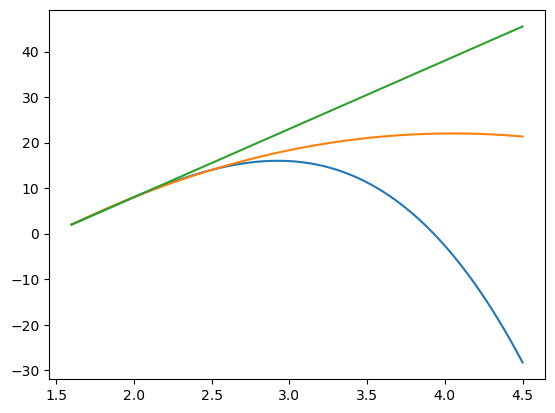

In [31]:
x_range = np.linspace(1.6, 4.5, 1000)
print(newton(nodes1, values1, 2.8))
print(newton(nodes2, values2, 2.8))
print(newton(nodes3, values3, 2.8))

plt.plot(x_range, newton(nodes1, values1, x_range))
plt.plot(x_range, newton(nodes2, values2, x_range))
plt.plot(x_range, newton(nodes3, values3, x_range))
plt.show()

-0.7261745236422114 -0.20178881676492028
0.524385706877291


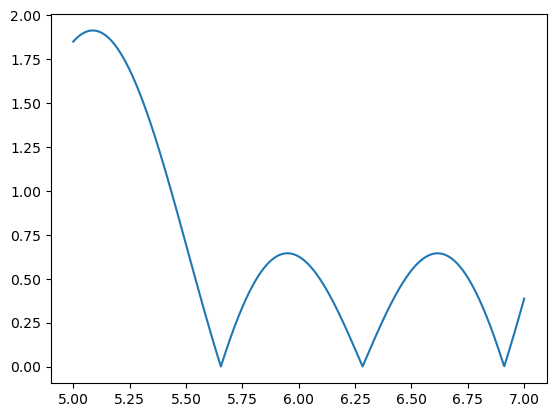

In [53]:
nodes = [5.89, 6.02, 6.15, 6.28]
values = [np.sin(current) for current in nodes]

def f(x):
    return np.sin(4 * x)

def lagrange(nodes, values, x):
    result = 0

    for i in range(len(nodes)):
        term = values[i]
        for j in range(len(nodes)):
            if i != j:
                term *= (x - nodes[j]) / (nodes[i] - nodes[j])
        result += term
    return result

def absolute_error(real, appr):
    return abs(real - appr)

# Екстраполация имаме за x_target = 6.08
x_target = 6.08
real_target_value = f(x_target)
appr_target_value = lagrange(nodes, values, x_target)
print(real_target_value, appr_target_value)
print(absolute_error(real_target_value, appr_target_value))

x_range = np.linspace(5, 7, 1000)
plt.plot(x_range, absolute_error(f(x_range),lagrange(nodes, values, x_range)))
plt.show()

In [45]:
# task 3
period = (np.pi * 2) / 24

nodes_period = [0, 6, 12, 18, 23]
values_period = [0, 0.22, 0.4, 0.2, 0.01]

In [47]:
def create_matrix(nodes):
    matrix = []

    for node in nodes:
        row = [1]
        for i in range(1, len(nodes)):
            if i % 2 == 1:
                row.append(np.cos((i // 2 + 1) * period * node))
            else:
                row.append(np.sin((i // 2) * period * node))
        matrix.append(row)
    return matrix

def calc(coef, x):
    result = coef[0]
    product = 1

    for i in range(1, len(coef)):
        if i % 2 == 1:
            result += coef[i] * np.cos(x * product * period)
        else:
            result += coef[i] * np.sin(x * product * period)
            product += 1
    return result

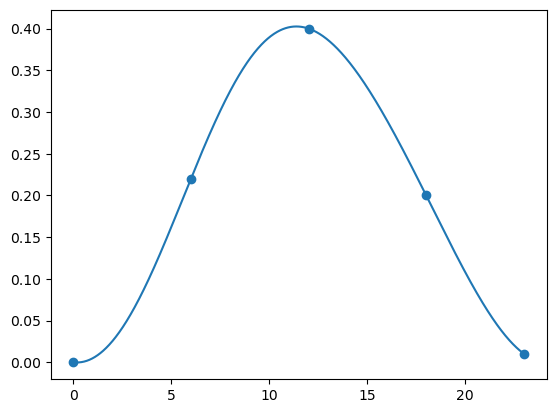

In [49]:
coef = np.linalg.solve(create_matrix(nodes_period), values_period)
x_range = np.linspace(0, 23, 1000)
plt.plot(x_range, calc(coef, x_range))
plt.scatter(nodes_period, values_period)
plt.show()